<a href="https://colab.research.google.com/github/abduhsalam/Suicide-Prevention-DTI/blob/main/Suicide_Prevention_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*FInal Project - Telkom Digital Talent Incubator*

- Group : 01
- Class : Data Sceince 01
- Member : 
   1. Abduh Salam
   2. Dimas Samodra
   3. Fahmi Fathur Rahman
   4. Hanizar Rachman
---

# **Social Media Suicide Detection**
---
Is an application that aims to detect a person's twitter post whether they have suicidal tendencies or not. The words from the post will be processed and classified, which will be the percentage label.

Label are used in between :

- Suicide
- Normal

## Import Libraries

In this code, we put **NLTK Libaries** for main tool for natural language processing. Essential library supports tasks like classification, tagging, stemming, tokenization. In the other, **Keras Libraries** to help the performance of Tensorflow so that the CPU and GPU can work optimally.

In [ ]:
!pip install nltk
!pip install keras
!pip3 install autokeras
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 174kB 16.0MB/s 
     |████████████████████████████████| 71kB 10.1MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78937 sha256=b2d27d611fef6642c5e234326b2b15b6da24635bbda83d25e369b24946c967d8
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=41ed81c8c68c3b642d5b6b700b7f44c9a62f72cbecc625d31af8fde38c4433e3
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzippin

True

## Obtaining the Dataset
For the dataset, we use data from **GitHub** that has been collected from **Twitter** post in between:
- https://raw.githubusercontent.com/hesamuel/goodbye_world/master/data/data_for_model_2.csv
- https://raw.githubusercontent.com/reetika-goel/Predict-Suicidal-Ideation-Based-on-Tweets/master/PredictSuicidalIdeationBasedonTweets/Train_suicide1.csv

**Read Dataset 1**

In this stage, we remove some parts of the data to make the process easier. Like, **URL, title, author**, etc. In addition, it shows the contents of the data in the form of a table. The data has been cleaned from several parts.

In [ ]:
import pandas as pd

# read csv file 1
df1 = pd.read_csv('https://raw.githubusercontent.com/hesamuel/goodbye_world/master/data/data_for_model_2.csv', sep=',')
df1 = df1.drop(['url', 'num_comments', 'author', 'title', 'selftext', 'selftext_clean', 'title_clean', 'author_clean', 'selftext_length', 'title_length'], axis=1)
df1 = df1.dropna()
# df1.loc[df1['is_suicide'] == 0, "is_suicide"] = 1
df1.head()

,is_suicide,megatext_clean
0,0,sql witch understand people reply immediately ...
1,0,c irc welcome r depression check post place ta...
2,0,new killer 69 feeling really depressed lonely ...
3,0,jazz le crab literally broke cry asked go home...
4,0,depressed kid 786 kind soul want give depresse...


**Read Dataset 2**

In [ ]:
#read csv file 2
df2 = pd.read_csv('https://raw.githubusercontent.com/reetika-goel/Predict-Suicidal-Ideation-Based-on-Tweets/master/PredictSuicidalIdeationBasedonTweets/Train_suicide1.csv', sep=',')
df2.loc[df2['Suicide'] == "Potential Suicide post ", "Suicide"] = 1
df2.loc[df2['Suicide'] == "Not Suicide post", "Suicide"] = 2
df2 = df2.rename(columns = {'Tweet': 'megatext_clean', 'Suicide': 'is_suicide'}, inplace = False)
df2.is_suicide.astype('int')
df2.head()

,megatext_clean,is_suicide
0,i hate myself so much i want to KILL myself ho...,1
1,RT @DrugForumsBest: I woke up with a bag over ...,1
2,i wanna fucking kill myself,1
3,why do i destroy all my opportunities? am i go...,1
4,u - understand what the fuck im doing wrong wi...,1


**Combine Dataset**

After the data has been obtained and some of its parts removed, the data is combined to facilitate preprocessing.

In [ ]:
# Combine data
df = pd.concat([df1, df2], ignore_index=True, sort=False)
df.loc[df['is_suicide'] == 1, "is_suicide"] = "suicide"
# df.loc[df['is_suicide'] == 0, "is_suicide"] = "suicide"
df.loc[df['is_suicide'] == 2, "is_suicide"] = "normal"
df = df[df.is_suicide != 0]
df.shape

(2579, 2)

To check the data used.

In [ ]:
df = df.dropna()
df.isnull().sum()

is_suicide        0
megatext_clean    0
dtype: int64

## Text Preprocessing

At this stage there are several functions from **Natural Language Toolkit (NTLK)** that help the process including:

- Case Folding converts the entire text in the data into a standard form.

    1. Converts the text to lowercase
    2. Remove the link and the word RT
    3. Remove numbers
    4. Remove punctuation mark
    5. Remove whitespace.

- Tokenization the stage of truncating the input string based on each word that composes it.

- Stemming the process of removing suffixes. Reduces the number of variations in the representation of a word.

- Lemmetizer a process of finding the basic form of a word.

- Text Vectorization is the process of converting text into numerical representation.

The processing result can be seen from the table below.

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 

# Case Folding
# Convert text to lowercase
df['megatext_clean'] = df['megatext_clean'].str.lower()

# Remove Twitter megatext_clean Link and RT word
df['megatext_clean'] = df['megatext_clean'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True).replace(r'rt', '', regex=True)

# Remove number
df['megatext_clean'] = df['megatext_clean'].str.replace('\d+', '')

# Remove Punctuation
df['megatext_clean'] = df['megatext_clean'].str.replace('[^\w\s]','')

# Remove Whitespaces
df["megatext_clean"] = df['megatext_clean'].str.strip()

# Tokenization
df["megatext_clean"] = df["megatext_clean"].apply(nltk.word_tokenize)

# StopWords Removal
stop_words = set(stopwords.words('english'))
df["megatext_clean"] = df["megatext_clean"].apply(lambda x: [item for item in x if item not in stop_words])

# Stemming
ps = PorterStemmer()
df['megatext_clean'] = df['megatext_clean'].apply(lambda x: [ps.stem(item) for item in x])

# Lemmetizer
lemmatizer = WordNetLemmatizer()
df['megatext_clean'] = df['megatext_clean'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

print(df.shape)
df.head()

(2577, 2)


,is_suicide,megatext_clean
917,suicide,"[sql, witch, see, worri, increas, pro, suicid,..."
918,suicide,"[sql, witch, want, recognis, occas, plea, offe..."
919,suicide,"[nu, nougat, croissant, realli, fuck, feel, ev..."
920,suicide,"[hd, svn, nj, hd, x, everyon, end, hate, event..."
921,suicide,"[lil, pee, mi, emptypost, nobodi, give, fuck, ..."


**Visualize Label Count**

To see how much the data from each label contains. For the functions, we use **Matplotlib Library** to make visualization.

suicide    1539
normal     1038
Name: is_suicide, dtype: int64


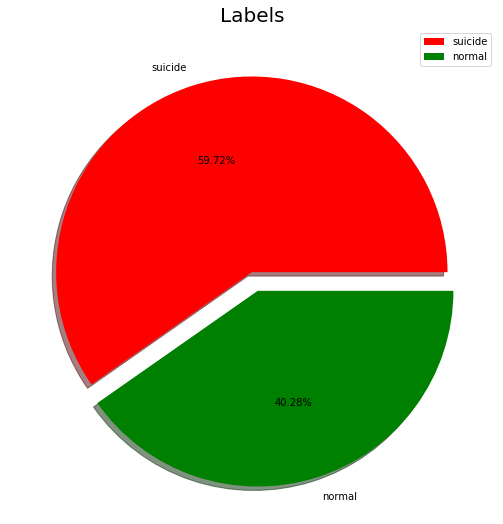

In [ ]:
import matplotlib.pyplot as plt

labels = ['suicide', 'normal']
size = df['is_suicide'].value_counts()
print(size)
colors = ['red', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Labels', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

As you can see, **Suicide** labels has **59.72%**, and **Normal** labels has **40.28%** from the dataset.

In [ ]:
df.to_csv('Preprocessed_Suicide_dataset.csv')

**Suicide Post Word Cloud**

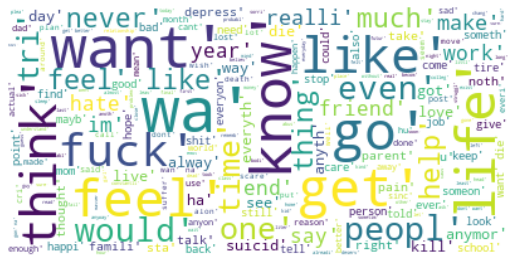

In [ ]:
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
from PIL import Image
warnings.filterwarnings("ignore")

# mask = np.array(Image.open("suicide_mask.png"))

# Create and generate a word cloud image:
word = " ".join(df.megatext_clean[df['is_suicide'] == "suicide"].astype('string'))
# word.head()
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(word)

# Display the generated image:
# plt.figure(figsize=(13,10))
plt.imshow(wordcloud, interpolation='bilinear')
wordcloud.to_file("sucide_wordcloud.png")

plt.axis("off")
plt.show()

## Classification

On this part, before classification the data used will be separated by 80% training data and 20% test data.

**Split into data train and data validation 80/20**





In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

X_train, X_test, y_train, y_test = train_test_split(df['megatext_clean'], df['is_suicide'], test_size=0.2, random_state=46)

size = y_test.value_counts()
print(size)

train_set = tf.data.Dataset.from_tensor_slices((X_train.astype(np.unicode), y_train))
test_set = tf.data.Dataset.from_tensor_slices((X_test.astype(np.unicode), y_test))

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

suicide    306
normal     210
Name: is_suicide, dtype: int64
(2061,) (2061,)
(516,) (516,)


After separated the data, we build the neural network layer for classification.

**Build Neural Network Model**

In [ ]:
import autokeras as ak

clf = ak.TextClassifier(
    num_classes=None,
    multi_label=False,
    loss='binary_crossentropy',
    metrics='accuracy',
    project_name="text_classifier",
    max_trials=100,
    objective="val_accuracy",
)

history = clf.fit(
    train_set, 
    epochs=3, 
    callbacks=None, 
    validation_data=(test_set)
)

Trial 100 Complete [00h 00m 04s]
val_accuracy: 0.9399224519729614

Best val_accuracy So Far: 0.9573643207550049
Total elapsed time: 00h 43m 37s
INFO:tensorflow:Oracle triggered exit
Epoch 1/3
65/65 [==============================] - 1s 12ms/step - loss: 0.4685 - accuracy: 0.6972 - val_loss: 0.3608 - val_accuracy: 0.9109
Epoch 2/3
65/65 [==============================] - 1s 9ms/step - loss: 0.2300 - accuracy: 0.9515 - val_loss: 0.2165 - val_accuracy: 0.9457
Epoch 3/3
65/65 [==============================] - 1s 9ms/step - loss: 0.0917 - accuracy: 0.9801 - val_loss: 0.2057 - val_accuracy: 0.9419
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets


In [ ]:
print(history)

## Model

At this stage, after classifying the data to get optimal results the data will be stored so that the model can be used without training and testing again.

The table below describes what is used at the classification stage such as its functions, and others

In [ ]:
model = clf.export_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None,)]                 0         
_________________________________________________________________
expand_last_dim (ExpandLastD (None, 1)                 0         
_________________________________________________________________
text_vectorization (TextVect (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                160032    
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32)               

In [ ]:
model.get_layer(index=9)

**Visualize Accuracy Every Epoch**

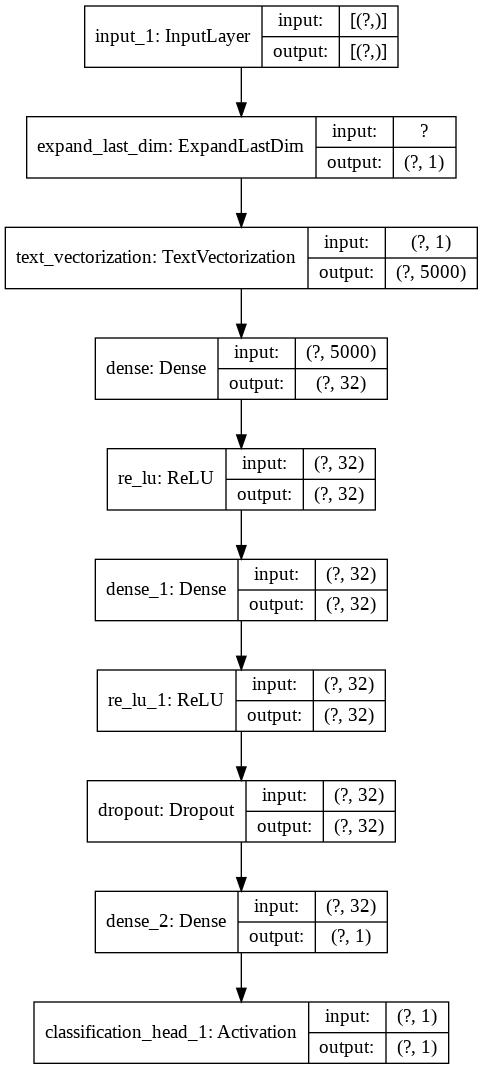

In [ ]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
tf.keras.utils.plot_model(model, to_file='./model.png', show_shapes=True)

**Save Model**

On this stage, the model will be stored using zip format. 

In [ ]:
model.save('English Suicide Prevention Model', save_format="tf")

INFO:tensorflow:Assets written to: English Suicide Prevention Model/assets


In [ ]:
!zip -r ./'English Suicide Prevention Model balance.zip' ./'English Suicide Prevention Model'

  adding: English Suicide Prevention Model/ (stored 0%)
  adding: English Suicide Prevention Model/assets/ (stored 0%)
  adding: English Suicide Prevention Model/saved_model.pb (deflated 90%)
  adding: English Suicide Prevention Model/variables/ (stored 0%)
  adding: English Suicide Prevention Model/variables/variables.data-00000-of-00001 (deflated 15%)
  adding: English Suicide Prevention Model/variables/variables.index (deflated 51%)
